# Essai apprentissage - 2 couches

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential, Model
from keras.layers import Input
from keras.layers.core import Dense, Dropout, Activation, Flatten, Lambda, Reshape, Permute
from keras.layers.convolutional import Convolution1D, Convolution2D, MaxPooling1D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.utils import np_utils
from tensorflow.keras.optimizers import SGD,Adam,Adagrad,Adadelta,RMSprop
from keras.constraints import max_norm

# Training du CNN sur le patient 1

In [3]:
x,y = np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/temporel'+str(1)+'_x_4hours.npy'),np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/temporel'+str(1)+'_y_4hours.npy')
train_images, train_labels,test_images, test_labels = np.expand_dims(x[19075:],-1),to_categorical(y[19075:]),np.expand_dims(x[:19075],-1),to_categorical(y[:19075])

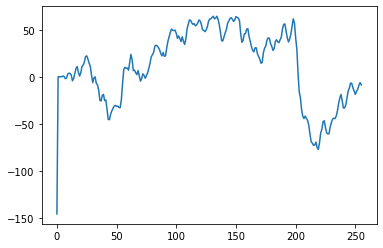

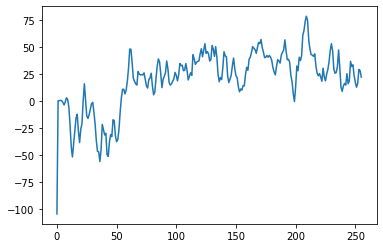

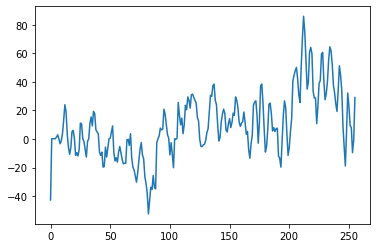

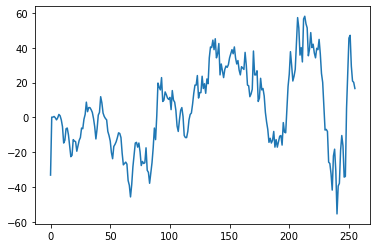

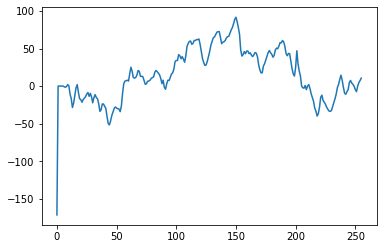

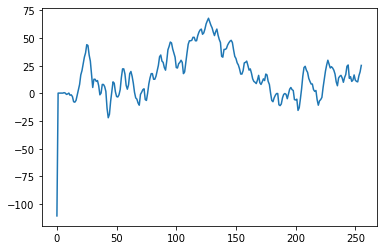

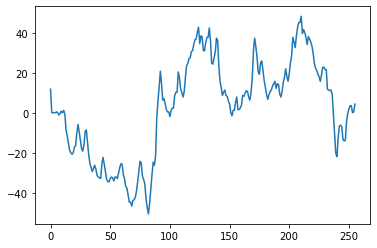

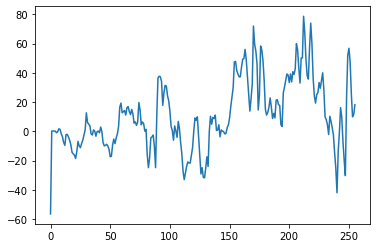

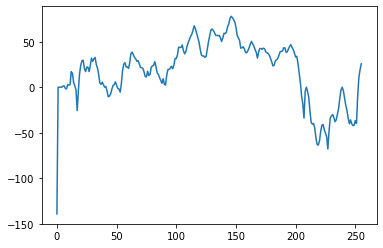

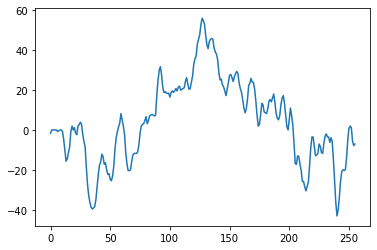

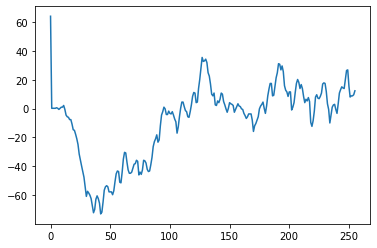

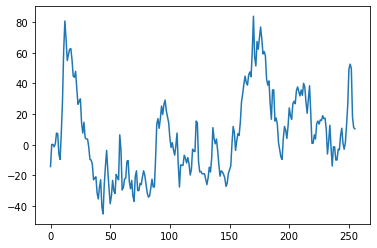

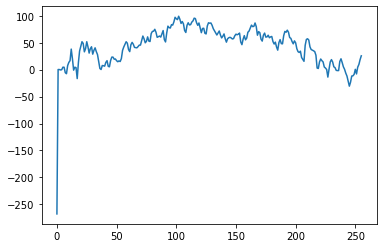

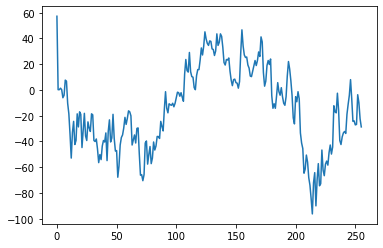

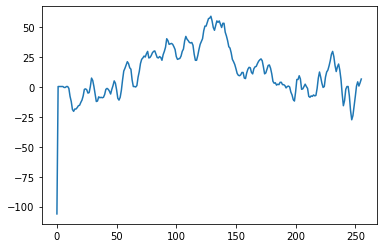

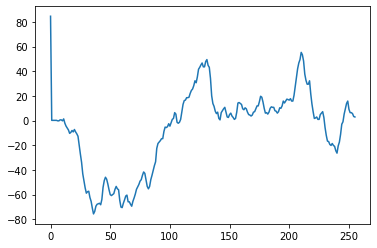

1


In [6]:
for i in range(16):
    plt.plot(x[0,:,i])
    plt.show()
print(y[1])

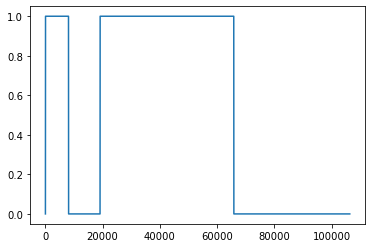

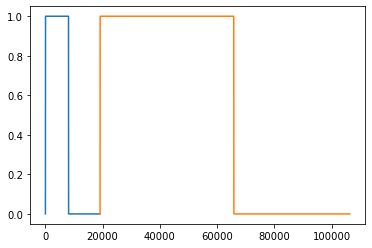

In [4]:
plt.plot(np.arange(0,len(y)),y)
plt.show()
plt.plot(np.arange(0,len(test_labels)),test_labels[:,1])
plt.plot(np.arange(len(test_labels),len(test_labels)+len(train_labels)),train_labels[:,1])
plt.show()


In [5]:
shuffled_index_train =np.arange(0,len(train_labels))
np.random.shuffle(shuffled_index_train)
train_images, train_labels = train_images[shuffled_index_train,:,:,:],train_labels[shuffled_index_train,:]

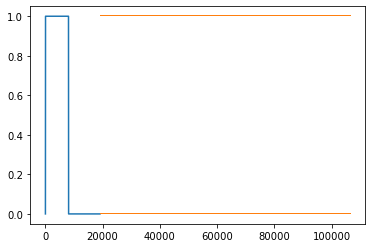

In [6]:
plt.plot(np.arange(0,len(test_labels)),test_labels[:,1])
plt.plot(np.arange(len(test_labels),len(test_labels)+len(train_labels)),train_labels[:,1],',')
plt.show()

In [7]:
train_images.shape

(87273, 256, 16, 1)

In [8]:
model = models.Sequential()

#model.add(layers.Input(train_images.shape[1:]))
model.add(layers.BatchNormalization(axis=1, name='normal1'))
model.add(layers.Convolution2D(1,(16,10),activation = 'relu',padding='valid', strides=(1,2),name='conv1'))
model.add(layers.MaxPooling2D(pool_size=(3,2)))

model.add(layers.BatchNormalization(axis=1, name='normal2'))
model.add(layers.Convolution2D(1,(1,2),activation = 'relu',padding='valid', strides=(1,2),name='conv2'))
model.add(layers.MaxPooling2D(pool_size=(2,1)))

#model.add(layers.BatchNormalization(axis=1, name='normal3'))
#model.add(layers.Convolution2D(64,(1,3),activation = 'relu',padding='valid', strides=(1,1),name='conv3'))
#model.add(layers.MaxPooling2D(pool_size=(2,1)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))



model.add(layers.Dense(2, activation='softmax',name='dens2'))


model.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy','AUC'])
model.evaluate(test_images,  test_labels, verbose=2)


2022-07-08 09:52:25.815966: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-08 09:52:26.398773: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9594 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:65:00.0, compute capability: 6.1
2022-07-08 09:52:28.043181: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8201


597/597 - 4s - loss: 44.7750 - accuracy: 0.5595 - auc: 0.5626 - 4s/epoch - 7ms/step


[44.774959564208984, 0.5595281720161438, 0.5626205205917358]

In [9]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normal1 (BatchNormalization  (None, 256, 16, 1)       1024      
 )                                                               
                                                                 
 conv1 (Conv2D)              (None, 241, 4, 1)         161       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 80, 2, 1)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dropout (Dropout)           (None, 160)               0         
                                                                 
 dens2 (Dense)               (None, 2)                 3

In [10]:


history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))


2022-07-07 16:27:21.318821: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1429880832 exceeds 10% of free system memory.
2022-07-07 16:27:22.431504: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1429880832 exceeds 10% of free system memory.


Epoch 1/20
2728/2728 [==============================] - 16s 6ms/step - loss: 0.0997 - accuracy: 0.9615 - auc: 0.9945 - val_loss: 0.8887 - val_accuracy: 0.4931 - val_auc: 0.6510
Epoch 2/20
2728/2728 [==============================] - 14s 5ms/step - loss: 0.0227 - accuracy: 0.9941 - auc: 0.9993 - val_loss: 0.9099 - val_accuracy: 0.5314 - val_auc: 0.6749
Epoch 3/20
2728/2728 [==============================] - 15s 6ms/step - loss: 0.0169 - accuracy: 0.9961 - auc: 0.9995 - val_loss: 0.9447 - val_accuracy: 0.5451 - val_auc: 0.6817
Epoch 4/20
2728/2728 [==============================] - 15s 6ms/step - loss: 0.0158 - accuracy: 0.9960 - auc: 0.9996 - val_loss: 1.0191 - val_accuracy: 0.5309 - val_auc: 0.6768
Epoch 5/20
2728/2728 [==============================] - 15s 6ms/step - loss: 0.0124 - accuracy: 0.9971 - auc: 0.9996 - val_loss: 1.0619 - val_accuracy: 0.5315 - val_auc: 0.6725
Epoch 6/20
2728/2728 [==============================] - 15s 6ms/step - loss: 0.0114 - accuracy: 0.9975 - auc: 0.999

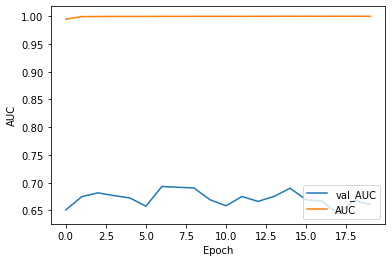

In [11]:
plt.plot(history.history['val_auc'], label = 'val_AUC')
plt.plot(history.history['auc'], label = 'AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend(loc='lower right')

#model.evaluate(test_images,  test_labels, verbose=2)


In [16]:
for i in range(3):
    model.layers[i].trainable = False
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normal1 (BatchNormalization  (None, 256, 16, 1)       1024      
 )                                                               
                                                                 
 conv1 (Conv2D)              (None, 241, 4, 1)         161       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 80, 2, 1)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dropout (Dropout)           (None, 160)               0         
                                                                 
 dens2 (Dense)               (None, 2)                 3

# Transfert du modèle sur le patient 10

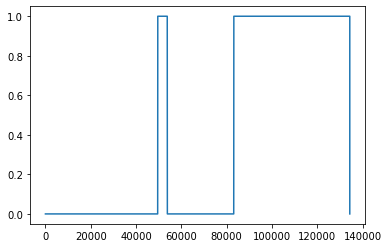

In [10]:
x2,y2 = np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/temporel'+str(10)+'_x_4hours.npy'),np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/temporel'+str(10)+'_y_4hours.npy')
plt.plot(np.arange(0,len(y2)),y2)
plt.show()

In [11]:
model.evaluate(np.expand_dims(x2,-1),  to_categorical(y2), verbose=2)

2022-07-08 09:52:49.174800: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 2200059904 exceeds 10% of free system memory.
2022-07-08 09:52:50.733383: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 2200059904 exceeds 10% of free system memory.


4197/4197 - 15s - loss: 57.7226 - accuracy: 0.5797 - auc: 0.5822 - 15s/epoch - 4ms/step


[57.72262191772461, 0.5796575546264648, 0.582194447517395]

In [12]:
x2_train, y2_train, x2_test, y2_test = np.concatenate((x2[:47000],x2[70000:])),np.concatenate((y2[:47000],y2[70000:])),x2[47000:70000,:,:],y2[47000:70000]


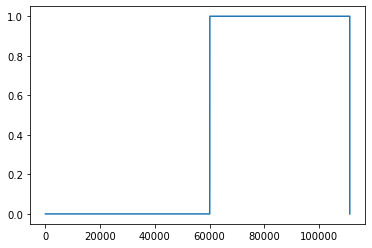

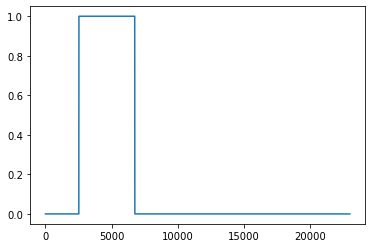

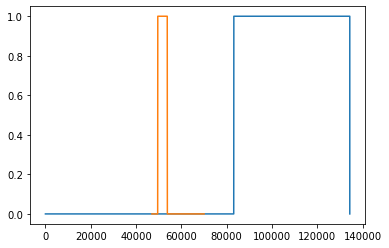

In [13]:
plt.plot(np.arange(0,len(y2_train)),y2_train)
plt.show()
plt.plot(np.arange(0,len(y2_test)),y2_test)
plt.show()
plt.plot(np.concatenate((np.arange(0,len(y2))[:47000],np.arange(0,len(y2))[70000:])),np.concatenate((y2[:47000],y2[70000:])))
plt.plot(np.arange(0,len(y2))[47000:70000],y2[47000:70000])
plt.show()

In [14]:
shuffled_index_train =np.arange(0,len(y2_train))
np.random.shuffle(shuffled_index_train)
x2_train,y2_train = x2_train[shuffled_index_train,:,:],y2_train[shuffled_index_train]
x2_train, y2_train, x2_test, y2_test= np.expand_dims(x2_train,-1),to_categorical(y2_train),np.expand_dims(x2_test,-1),to_categorical(y2_test)
history = model.fit(x2_train, y2_train, epochs=10, 
                    validation_data=(x2_test, y2_test))

2022-07-08 09:53:09.756528: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1823227904 exceeds 10% of free system memory.
2022-07-08 09:53:11.057160: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1823227904 exceeds 10% of free system memory.


Epoch 1/10
3478/3478 [==============================] - 20s 6ms/step - loss: 0.1522 - accuracy: 0.9561 - auc: 0.9875 - val_loss: 0.0747 - val_accuracy: 0.9884 - val_auc: 0.9967
Epoch 2/10
3478/3478 [==============================] - 20s 6ms/step - loss: 0.0900 - accuracy: 0.9737 - auc: 0.9928 - val_loss: 0.0608 - val_accuracy: 0.9886 - val_auc: 0.9973
Epoch 3/10
3478/3478 [==============================] - 19s 6ms/step - loss: 0.0859 - accuracy: 0.9749 - auc: 0.9930 - val_loss: 0.0562 - val_accuracy: 0.9890 - val_auc: 0.9978
Epoch 4/10
3478/3478 [==============================] - 20s 6ms/step - loss: 0.0827 - accuracy: 0.9764 - auc: 0.9934 - val_loss: 0.0644 - val_accuracy: 0.9873 - val_auc: 0.9959
Epoch 5/10
3478/3478 [==============================] - 19s 5ms/step - loss: 0.0820 - accuracy: 0.9765 - auc: 0.9932 - val_loss: 0.0520 - val_accuracy: 0.9905 - val_auc: 0.9978
Epoch 6/10
3478/3478 [==============================] - 19s 6ms/step - loss: 0.0806 - accuracy: 0.9773 - auc: 0.993

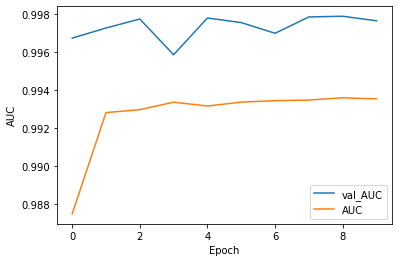

In [15]:
plt.plot(history.history['val_auc'], label = 'val_AUC')
plt.plot(history.history['auc'], label = 'AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')

plt.legend(loc='lower right')

# transfert du modele sur le patient 7

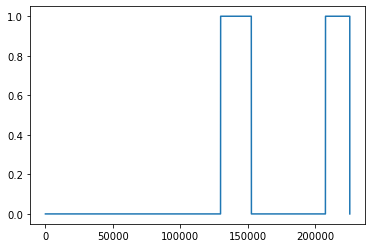

In [17]:
n_patient = 7
x2,y2 = np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/temporel'+str(n_patient)+'_x_4hours.npy'),np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/temporel'+str(n_patient)+'_y_4hours.npy')
plt.plot(np.arange(0,len(y2)),y2)
plt.show()

In [18]:
model.evaluate(np.expand_dims(x2,-1),  to_categorical(y2), verbose=2)

2022-07-08 09:57:05.541121: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 3693314048 exceeds 10% of free system memory.


7045/7045 - 25s - loss: 0.7583 - accuracy: 0.9109 - auc: 0.9004 - 25s/epoch - 4ms/step


[0.7583034038543701, 0.9109181761741638, 0.9004335403442383]

In [19]:
x2_train, y2_train, x2_test, y2_test = x2[:153000],y2[:153000],x2[153000:],y2[153000:]


In [20]:
shuffled_index_train =np.arange(0,len(y2_train))
np.random.shuffle(shuffled_index_train)
x2_train,y2_train = x2_train[shuffled_index_train,:,:],y2_train[shuffled_index_train]
x2_train, y2_train, x2_test, y2_test= np.expand_dims(x2_train,-1),to_categorical(y2_train),np.expand_dims(x2_test,-1),to_categorical(y2_test)
history = model.fit(x2_train, y2_train, epochs=10, 
                    validation_data=(x2_test, y2_test))

Epoch 1/10
4782/4782 [==============================] - 34s 7ms/step - loss: 0.0754 - accuracy: 0.9795 - auc: 0.9951 - val_loss: 0.4654 - val_accuracy: 0.9021 - val_auc: 0.9094
Epoch 2/10
4782/4782 [==============================] - 31s 6ms/step - loss: 0.0520 - accuracy: 0.9857 - auc: 0.9975 - val_loss: 0.5268 - val_accuracy: 0.8971 - val_auc: 0.9029
Epoch 3/10
4782/4782 [==============================] - 31s 6ms/step - loss: 0.0493 - accuracy: 0.9864 - auc: 0.9975 - val_loss: 0.4731 - val_accuracy: 0.9145 - val_auc: 0.9136
Epoch 4/10
4782/4782 [==============================] - 32s 7ms/step - loss: 0.0485 - accuracy: 0.9867 - auc: 0.9974 - val_loss: 0.6082 - val_accuracy: 0.8936 - val_auc: 0.8927
Epoch 5/10
4782/4782 [==============================] - 30s 6ms/step - loss: 0.0481 - accuracy: 0.9863 - auc: 0.9979 - val_loss: 0.5305 - val_accuracy: 0.9077 - val_auc: 0.9319
Epoch 6/10
4782/4782 [==============================] - 31s 7ms/step - loss: 0.0462 - accuracy: 0.9871 - auc: 0.998

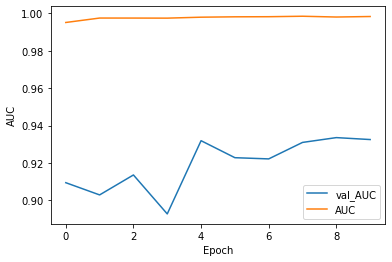

In [21]:
plt.plot(history.history['val_auc'], label = 'val_AUC')
plt.plot(history.history['auc'], label = 'AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend(loc='lower right')

# Transfert sur patient 22

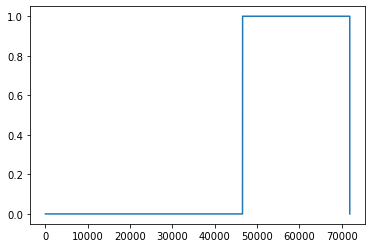

In [22]:
n_patient = 22
x2,y2 = np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/temporel'+str(n_patient)+'_x_4hours.npy'),np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/temporel'+str(n_patient)+'_y_4hours.npy')
plt.plot(np.arange(0,len(y2)),y2)
plt.show()

In [23]:
model.evaluate(np.expand_dims(x2,-1),  to_categorical(y2), verbose=2)

2248/2248 - 8s - loss: 0.5672 - accuracy: 0.7969 - auc: 0.9065 - 8s/epoch - 4ms/step


[0.5672091245651245, 0.7968847751617432, 0.9065415859222412]

In [24]:
x2_train, y2_train, x2_test, y2_test = np.concatenate((x2[:30000],x2[55000:])),np.concatenate((y2[:30000],y2[55000:])),x2[30000:55000],y2[30000:55000]


In [25]:
shuffled_index_train =np.arange(0,len(y2_train))
np.random.shuffle(shuffled_index_train)
x2_train,y2_train = x2_train[shuffled_index_train,:,:],y2_train[shuffled_index_train]
x2_train, y2_train, x2_test, y2_test= np.expand_dims(x2_train,-1),to_categorical(y2_train),np.expand_dims(x2_test,-1),to_categorical(y2_test)
history = model.fit(x2_train, y2_train, epochs=10, 
                    validation_data=(x2_test, y2_test))

Epoch 1/10
1466/1466 [==============================] - 11s 8ms/step - loss: 0.0887 - accuracy: 0.9689 - auc: 0.9942 - val_loss: 0.3222 - val_accuracy: 0.9038 - val_auc: 0.9544
Epoch 2/10
1466/1466 [==============================] - 10s 7ms/step - loss: 0.0555 - accuracy: 0.9801 - auc: 0.9976 - val_loss: 0.2505 - val_accuracy: 0.9211 - val_auc: 0.9684
Epoch 3/10
1466/1466 [==============================] - 10s 7ms/step - loss: 0.0496 - accuracy: 0.9820 - auc: 0.9979 - val_loss: 0.2855 - val_accuracy: 0.9151 - val_auc: 0.9629
Epoch 4/10
1466/1466 [==============================] - 10s 7ms/step - loss: 0.0445 - accuracy: 0.9841 - auc: 0.9983 - val_loss: 0.3615 - val_accuracy: 0.9062 - val_auc: 0.9521
Epoch 5/10
1466/1466 [==============================] - 10s 7ms/step - loss: 0.0444 - accuracy: 0.9848 - auc: 0.9982 - val_loss: 0.2843 - val_accuracy: 0.9166 - val_auc: 0.9649
Epoch 6/10
1466/1466 [==============================] - 10s 7ms/step - loss: 0.0402 - accuracy: 0.9857 - auc: 0.998

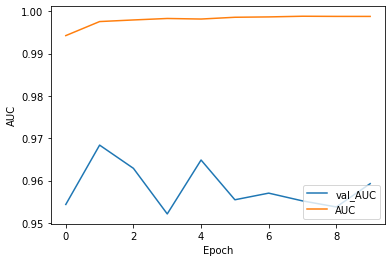

In [26]:
plt.plot(history.history['val_auc'], label = 'val_AUC')
plt.plot(history.history['auc'], label = 'AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend(loc='lower right')

# transfert sur patient 16

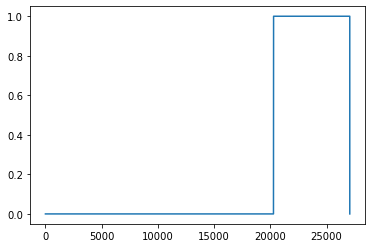

In [27]:
n_patient = 16
x2,y2 = np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/temporel'+str(n_patient)+'_x_4hours.npy'),np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/temporel'+str(n_patient)+'_y_4hours.npy')
plt.plot(np.arange(0,len(y2)),y2)
plt.show()

In [28]:
model.evaluate(np.expand_dims(x2,-1),  to_categorical(y2), verbose=2)

846/846 - 3s - loss: 4.4133 - accuracy: 0.6618 - auc: 0.7126 - 3s/epoch - 4ms/step


[4.4133405685424805, 0.6618016362190247, 0.7125842571258545]

In [29]:
x2_train, y2_train, x2_test, y2_test = np.concatenate((x2[:15000],x2[22000:])),np.concatenate((y2[:15000],y2[22000:])),x2[15000:22000],y2[15000:22000]


In [30]:
shuffled_index_train =np.arange(0,len(y2_train))
np.random.shuffle(shuffled_index_train)
x2_train,y2_train = x2_train[shuffled_index_train,:,:],y2_train[shuffled_index_train]
x2_train, y2_train, x2_test, y2_test= np.expand_dims(x2_train,-1),to_categorical(y2_train),np.expand_dims(x2_test,-1),to_categorical(y2_test)
history = model.fit(x2_train, y2_train, epochs=10, 
                    validation_data=(x2_test, y2_test))

Epoch 1/10
627/627 [==============================] - 4s 7ms/step - loss: 0.6589 - accuracy: 0.8096 - auc: 0.8698 - val_loss: 1.2899 - val_accuracy: 0.7259 - val_auc: 0.7497
Epoch 2/10
627/627 [==============================] - 4s 7ms/step - loss: 0.3531 - accuracy: 0.8709 - auc: 0.9384 - val_loss: 0.9214 - val_accuracy: 0.7454 - val_auc: 0.7903
Epoch 3/10
627/627 [==============================] - 4s 7ms/step - loss: 0.3206 - accuracy: 0.8835 - auc: 0.9451 - val_loss: 0.7429 - val_accuracy: 0.7416 - val_auc: 0.8265
Epoch 4/10
627/627 [==============================] - 4s 7ms/step - loss: 0.3026 - accuracy: 0.8853 - auc: 0.9493 - val_loss: 0.7149 - val_accuracy: 0.7503 - val_auc: 0.8310
Epoch 5/10
627/627 [==============================] - 4s 7ms/step - loss: 0.2944 - accuracy: 0.8909 - auc: 0.9512 - val_loss: 0.7513 - val_accuracy: 0.7500 - val_auc: 0.8252
Epoch 6/10
627/627 [==============================] - 4s 7ms/step - loss: 0.2967 - accuracy: 0.8922 - auc: 0.9515 - val_loss: 0.79

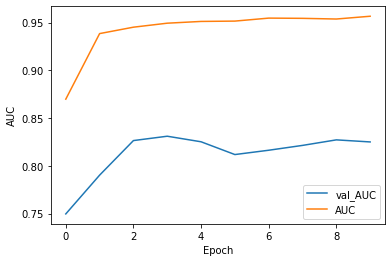

In [31]:
plt.plot(history.history['val_auc'], label = 'val_AUC')
plt.plot(history.history['auc'], label = 'AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend(loc='lower right')